In [113]:
#importing packages and dependendies for the analysis
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [114]:
# Read the transactional database
df = pd.read_excel('C:/Users/User/Desktop/Fox/Transactional_Database.xlsx')

In [118]:
#data cleaning and wrangling to prepapre for analysis

#make new columns called revenue and total cost and profit
df['revenue'] = df['Sell']* df['quantity']
df['total_cost'] = df['Cost']* df['quantity']
df['Profit'] = df['revenue'] - df['total_cost']

# Convert dates to weeks and add a new column 'week_number'
df['Date_Processed'] = pd.to_datetime(df['Date_Processed'])  

# Convert 'dates' column to datetime format
df['week_number'] = df['Date_Processed'].dt.isocalendar().week

#create a column that have the word 'week' and the week numbers
df['week_number2'] = 'week ' + df['week_number'].astype(str)

# Filter rows by keeping only the ones with 'status' as 'completed'
#this is to remove rows with status that are cancelled, refund,failed, processing, on hold and pending, this is to limit 
#the analysis to completed transaction ONLY
df = df[df['status'] == 'completed']

#There are some rows with order numbers that did not start with FP, this is to harmonize every order number to start with FP
# Update values in 'order nuumber' column to include FP for those without it
df['Order Number'] = df['Order Number'].apply(lambda x: 'FP' + str(x) if not str(x).startswith('FP') else x)

print(df)

             name    site  quantity    Sell     status Order Number   Cost  \
1203    Product 9  pharma         4   35.51  completed     FP229768  23.87   
1387    Product 1  pharma         1  208.97  completed     FP228956  18.31   
1388    Product 1  pharma         1  208.97  completed     FP228966  18.31   
1389    Product 1  pharma         1  208.97  completed     FP228985  18.31   
1390    Product 1  pharma         1  208.97  completed     FP228985  18.31   
...           ...     ...       ...     ...        ...          ...    ...   
71399  Product 99  pharma         1  141.26  completed     FP202802  29.57   
71400  Product 99  pharma         1  141.26  completed     FP202806  29.57   
71401  Product 99  pharma         1  141.26  completed     FP202818  29.57   
71402  Product 99  pharma         1  141.26  completed     FP202820  29.57   
71403  Product 99  pharma         1  141.26  completed     FP202825  29.57   

      Date_Processed                    email product_category 

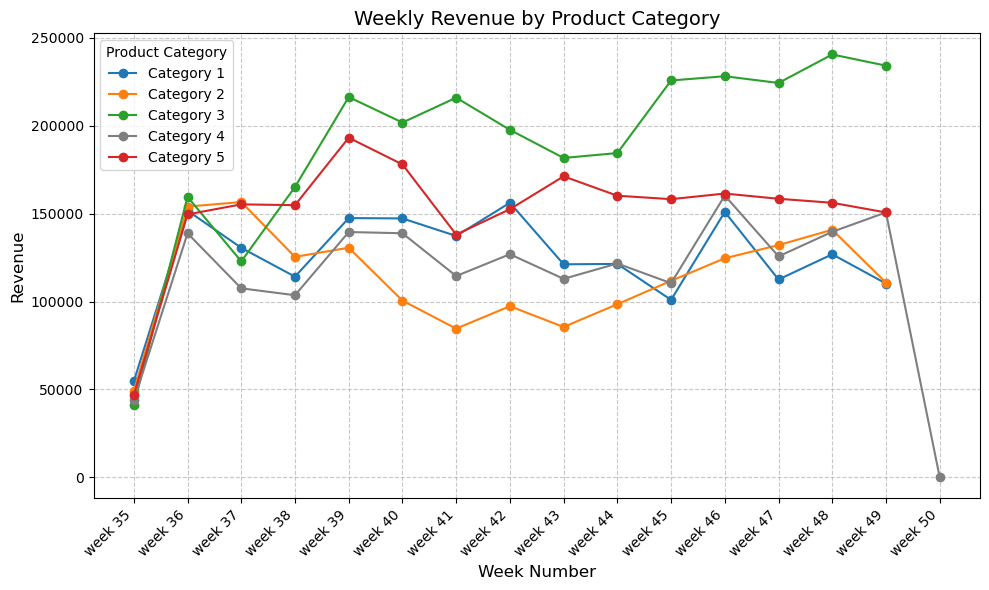

In [119]:
#Q1.Using “Transactional Database”, plot a chart showing weekly revenue, profits, and profit margins for each product category.

#Revenue chart

# Group the DataFrame by 'product_category' and 'week_number' and calculate the sum of 'revenue'
revenue_df = df.groupby(['product_category', 'week_number2'])['revenue'].sum().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
categories = revenue_df['product_category'].unique()

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:grey', 'tab:red']

# Plot the lines for each category
for i, category in enumerate(categories):
    category_data = revenue_df[revenue_df['product_category'] == category]
    ax.plot(category_data['week_number2'], category_data['revenue'], color=colors[i], marker='o', label=category)
    
# Customize the plot appearance
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Product Category')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
plt.title('Weekly Revenue by Product Category', fontsize=14)

# Adjust the x-axis labels
ax.set_xticks(revenue_df['week_number2'].unique())
ax.set_xticklabels(revenue_df['week_number2'].unique(), rotation=45, ha='right', fontsize=10)


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

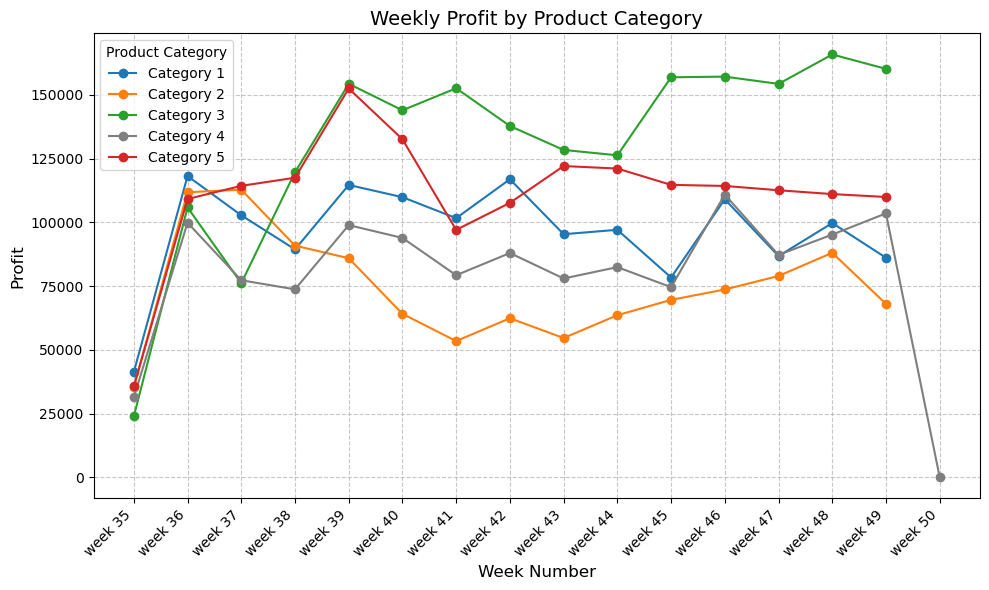

In [120]:
#Q1.Using “Transactional Database”, plot a chart showing weekly revenue, profits, and profit margins for each product category.

#Profit chart
# Group the DataFrame by 'product_category' and 'week_number' and calculate the sum of 'Profit'
profit_df = df.groupby(['product_category', 'week_number2'])['Profit'].sum().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
categories = profit_df['product_category'].unique()

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:grey', 'tab:red']

# Plot the lines for each category
for i, category in enumerate(categories):
    category_data = profit_df[profit_df['product_category'] == category]
    ax.plot(category_data['week_number2'], category_data['Profit'], color=colors[i], marker='o', label=category)
    
# Customize the plot appearance
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Product Category')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
plt.title('Weekly Profit by Product Category', fontsize=14)

# Adjust the x-axis labels
ax.set_xticks(profit_df['week_number2'].unique())
ax.set_xticklabels(profit_df['week_number2'].unique(), rotation=45, ha='right', fontsize=10)


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

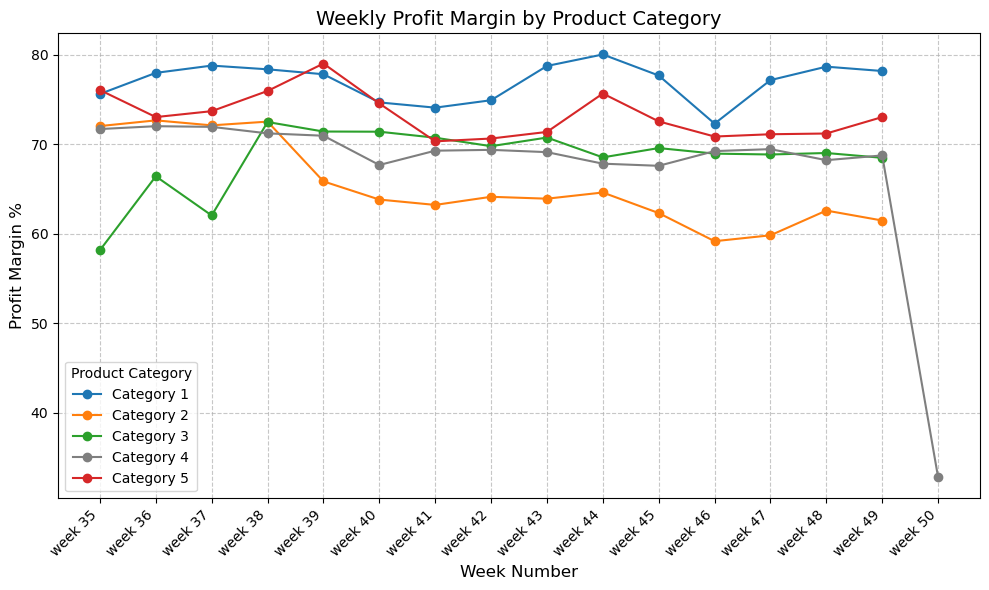

In [121]:
#Profit margin as profit/revenue*100

PM_df = df.groupby([pd.Grouper(key='week_number2'), 'product_category']).agg({'Profit': 'sum', 'revenue': 'sum'})
PM_df['profit_margin'] = (PM_df['Profit'] / PM_df['revenue']) * 100
PM_df = PM_df.reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
categories = PM_df['product_category'].unique()

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:grey', 'tab:red']

# Plot the lines for each category
for i, category in enumerate(categories):
    category_data = PM_df[PM_df['product_category'] == category]
    ax.plot(category_data['week_number2'], category_data['profit_margin'], color=colors[i], marker='o', label=category)
    
# Customize the plot appearance
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Product Category')
ax.set_xlabel('Week Number', fontsize=12)
ax.set_ylabel('Profit Margin %', fontsize=12)
plt.title('Weekly Profit Margin by Product Category', fontsize=14)

# Adjust the x-axis labels
ax.set_xticks(PM_df['week_number2'].unique())
ax.set_xticklabels(PM_df['week_number2'].unique(), rotation=45, ha='right', fontsize=10)


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


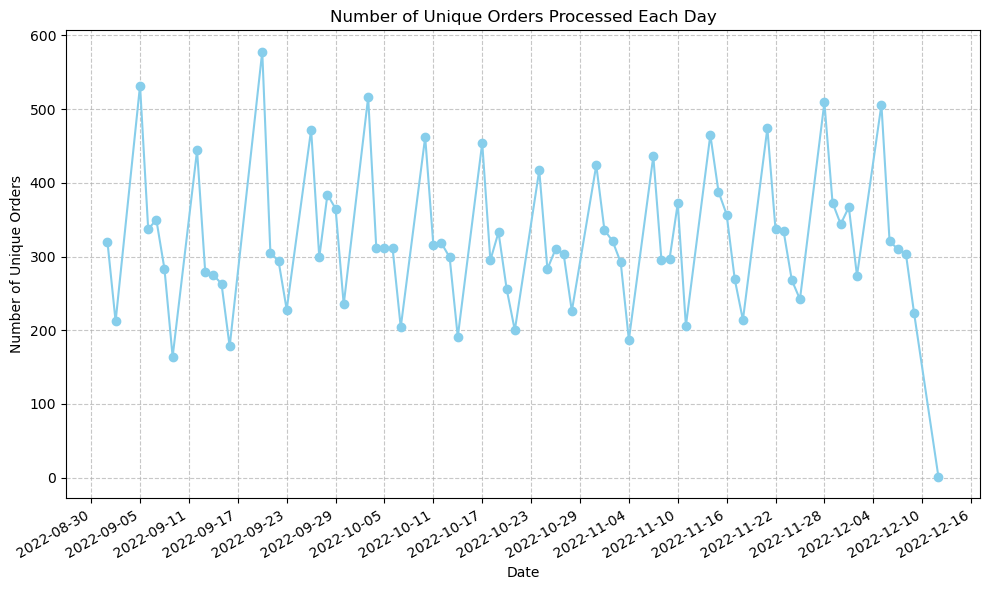

In [130]:
#Q2. Plot a chart showing the number of unique orders processed every day. Comment on any trends observed.

# Group the DataFrame by 'Date_Processed' and count the number of unique 'order_number'
daily_orders = df.groupby('Date_Processed')['Order Number'].nunique()

# Plot the chart
fig, ax = plt.subplots(figsize=(10, 6))
daily_orders.plot(kind='line', marker='o', color='skyblue', ax=ax)

# Customize the plot appearance
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Unique Orders')
plt.title('Number of Unique Orders Processed Each Day')

# Set x-axis tick frequency to show fewer labels
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


#The trend observed
#There is a noticeable pattern of weekly fluctuations in the number of unique orders. Initially, there is a spike in orders
#at the beginning of each week, followed by a gradual decrease in the succeeding days. Eventually, the number of orders 
#reaches its lowest point. However, after this dip, there is another spike in orders, which tends to surpass the previous
#midweek figures. This is followed by a subsequent decline in the number of orders and the cycle repeats itself 
#on a weekly basis.

In [131]:
#Q3.Calculate each customer’s (identified by email address) lifetime spend, and assign them the following categories

# Group the DataFrame by 'email' and calculate the total spend for each customer
customer_spend = df.groupby('email')['revenue'].sum().reset_index()

# Define spend thresholds and customer categories, 30,000 is used as the highest band as no customer spent up to this amount
spend_thresholds = [0, 1000, 3000, 5000, 10000, 30000]
customer_categories = ['Sub-1k', 'Core-1k', 'Core-3k', 'Core-5k', 'VIP']

# Assign customer categories based on spend
customer_spend_category = pd.cut(customer_spend['revenue'], bins=spend_thresholds, labels=customer_categories, right=False)

# Create a new DataFrame with customer email, lifetime spend, and category
customer_data = pd.DataFrame({'email': customer_spend['email'], 'lifetime_spend': customer_spend['revenue'], 'category': customer_spend_category})

# Merge customer_data with the main df on 'email' column
df = df.merge(customer_data, on='email', how='left')

# Print the updated DataFrame
print(df)


             name    site  quantity    Sell     status Order Number   Cost  \
0       Product 9  pharma         4   35.51  completed     FP229768  23.87   
1       Product 1  pharma         1  208.97  completed     FP228956  18.31   
2       Product 1  pharma         1  208.97  completed     FP228966  18.31   
3       Product 1  pharma         1  208.97  completed     FP228985  18.31   
4       Product 1  pharma         1  208.97  completed     FP228985  18.31   
...           ...     ...       ...     ...        ...          ...    ...   
56297  Product 99  pharma         1  141.26  completed     FP202802  29.57   
56298  Product 99  pharma         1  141.26  completed     FP202806  29.57   
56299  Product 99  pharma         1  141.26  completed     FP202818  29.57   
56300  Product 99  pharma         1  141.26  completed     FP202820  29.57   
56301  Product 99  pharma         1  141.26  completed     FP202825  29.57   

      Date_Processed                    email product_category 

In [132]:
#Q4 For each week of data captured in the dataset, what is the average revenue per order? 
#What is the average revenue per order per week for each category of customers?

# Group the DataFrame by 'week' and calculate the average revenue per order
average_revenue_per_order = df.groupby('week_number2')['revenue'].mean()

# Print the average revenue per order for each week
print(average_revenue_per_order)


week_number2
week 35    177.364864
week 36    185.982247
week 37    189.967172
week 38    194.007392
week 39    187.209570
week 40    183.977034
week 41    178.664018
week 42    193.866363
week 43    183.466747
week 44    188.324517
week 45    186.894720
week 46    190.982586
week 47    189.852966
week 48    182.777639
week 49    189.698507
week 50    142.040000
Name: revenue, dtype: float64


In [133]:
#cont Q4
# Group the DataFrame by 'week' and 'category' and calculate the average revenue per order
average_revenue_per_order = df.groupby(['week_number2', 'category'])['revenue'].mean()

# Print the average revenue per order per week for each category
print(average_revenue_per_order)

week_number2  category
week 35       Sub-1k      148.245059
              Core-1k     180.359778
              Core-3k     246.871429
              Core-5k     183.508750
              VIP         284.400923
                             ...    
week 50       Sub-1k      142.040000
              Core-1k            NaN
              Core-3k            NaN
              Core-5k            NaN
              VIP                NaN
Name: revenue, Length: 80, dtype: float64


In [134]:
#Q5 Identify a list of customers that have placed at least one order containing Product 6 after having received one for free
#For these customers, produce a list of the Revenue and Profits generated per customer from Product 6, and the number of 
#units sold.

# Filter the DataFrame for customers who have received Product 6 for free
free_product_customers = df[(df['name'] == 'Product 6') & (df['revenue'] == 0)]['email'].unique()

# Filter the DataFrame for customers who have placed orders containing Product 6 after receiving one Product 6 for free
customers_with_product6 = df[(df['name'] == 'Product 6') & (df['email'].isin(free_product_customers))]

# Group the filtered DataFrame by customer email and calculate the revenue, profits, and units sold per customer for Product 6
product6_stats = customers_with_product6.groupby('email').agg({'revenue': 'sum', 'Profit': 'sum', 'quantity': 'sum'})

# Remove customers who did not make subsequent purchases
product6_stats = product6_stats[product6_stats['revenue'] > 0]

# Print the result
print(product6_stats)



                         revenue  Profit  quantity
email                                             
Customer1191@domain.com   558.69  356.84         5
Customer4282@domain.com  1117.38  870.15         9
Customer437@domain.com    186.23   69.78         2
Customer5886@domain.com   186.23   69.78         2
customer1625@domain.com   186.23   69.78         2
customer5262@domain.com   186.23   69.78         2


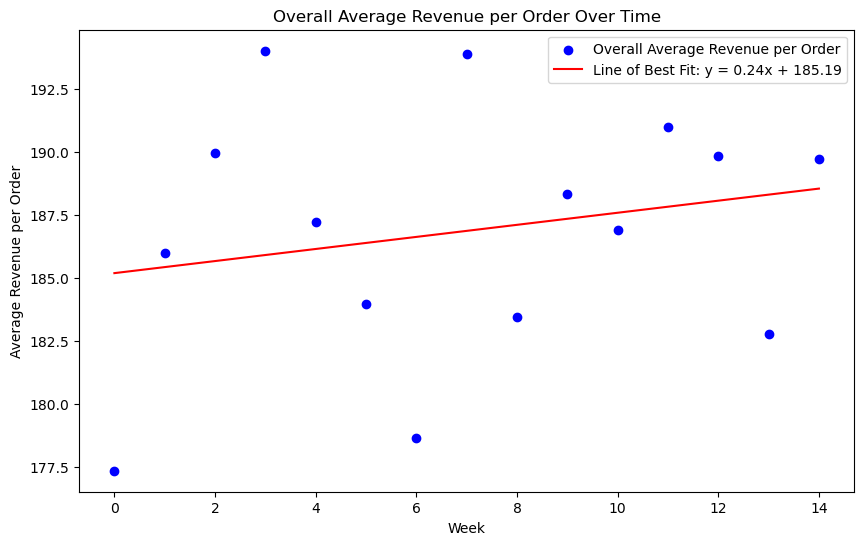

In [135]:
#Q6.Find lines of best fit for the overall average revenue per order, and each customer category’s average revenue per order.
#Comment on trends over time, and how average revenue per order per changes between customer categories

#remove the last week because week 50 has only sub 1k data and the other categories are missing
df= df[df['week_number'] != 50]

# Calculate the overall average revenue per order for each week
overall_avg_revenue_per_order = df.groupby('week_number2')['revenue'].mean()

# Calculate the average revenue per order per week for each customer category
avg_revenue_per_order_per_category = df.groupby(['week_number2', 'category'])['revenue'].mean().unstack()

# Perform linear regression for the overall average revenue per order
x_overall = np.arange(len(overall_avg_revenue_per_order)).reshape(-1, 1)
y_overall = overall_avg_revenue_per_order.values.reshape(-1, 1)
reg_overall = LinearRegression().fit(x_overall, y_overall)
y_pred_overall = reg_overall.predict(x_overall)
m_overall = reg_overall.coef_[0][0]
b_overall = reg_overall.intercept_[0]

# Perform linear regression for each customer category's average revenue per order
x_categories = np.arange(len(avg_revenue_per_order_per_category)).reshape(-1, 1)
reg_categories = {}
y_pred_categories = {}
formulas = {}
for category in avg_revenue_per_order_per_category.columns:
    y_category = avg_revenue_per_order_per_category[category].values.reshape(-1, 1)
    reg_categories[category] = LinearRegression().fit(x_categories, y_category)
    y_pred_categories[category] = reg_categories[category].predict(x_categories)
    m_category = reg_categories[category].coef_[0][0]
    b_category = reg_categories[category].intercept_[0]
    formulas[category] = f"y = {m_category:.2f}x + {b_category:.2f}"

# Plot the overall average revenue per order over time
plt.figure(figsize=(10, 6))
plt.scatter(x_overall, y_overall, color='b', label='Overall Average Revenue per Order')
plt.plot(x_overall, y_pred_overall, color='r', label=f'Line of Best Fit: y = {m_overall:.2f}x + {b_overall:.2f}')
plt.xlabel('Week')
plt.ylabel('Average Revenue per Order')
plt.title('Overall Average Revenue per Order Over Time')
plt.legend()
plt.show()

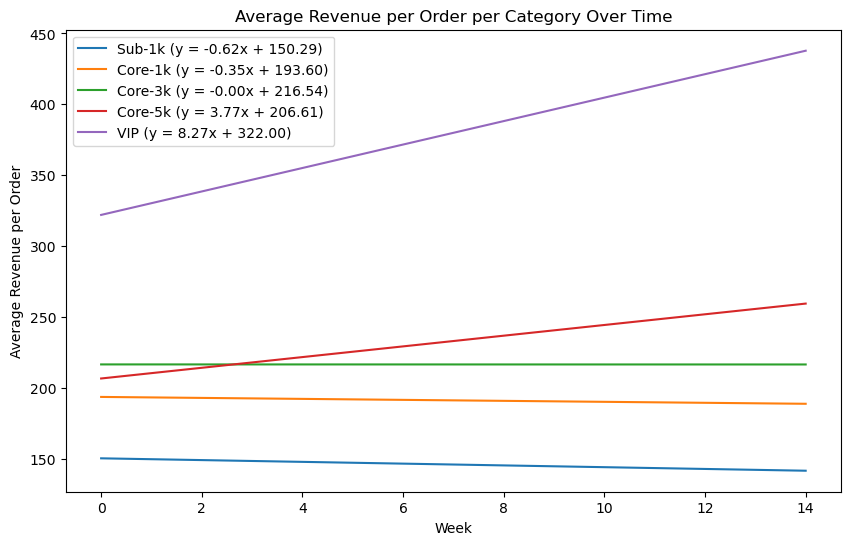

In [136]:
#Q6 cont. Perform linear regression for each customer category's average revenue per order
x_categories = np.arange(len(avg_revenue_per_order_per_category)).reshape(-1, 1)
reg_categories = {}
y_pred_categories = {}
formulas = {}
plt.figure(figsize=(10, 6))

for category in avg_revenue_per_order_per_category.columns:
    y_category = avg_revenue_per_order_per_category[category].values.reshape(-1, 1)
    reg_categories[category] = LinearRegression().fit(x_categories, y_category)
    y_pred_categories[category] = reg_categories[category].predict(x_categories)
    m_category = reg_categories[category].coef_[0][0]
    b_category = reg_categories[category].intercept_[0]
    formulas[category] = f"y = {m_category:.2f}x + {b_category:.2f}"

    # Plot the regression line for each category
    plt.plot(x_categories, y_pred_categories[category], label=f'{category} ({formulas[category]})')

plt.xlabel('Week')
plt.ylabel('Average Revenue per Order')
plt.title('Average Revenue per Order per Category Over Time')
plt.legend()
plt.show()
